In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/drive/MyDrive'

In [4]:
!kaggle datasets download -d subhajournal/free-spoken-digit-database

Dataset URL: https://www.kaggle.com/datasets/subhajournal/free-spoken-digit-database
License(s): Attribution 4.0 International (CC BY 4.0)
 99% 324M/327M [00:12<00:00, 31.0MB/s]
100% 327M/327M [00:12<00:00, 28.4MB/s]


In [5]:
!unzip \*.zip && rm *.zip

Streaming output truncated to the last 5000 lines.
  inflating: three/264f471d_nohash_0.wav  
  inflating: three/264f471d_nohash_1.wav  
  inflating: three/264f471d_nohash_2.wav  
  inflating: three/264f471d_nohash_3.wav  
  inflating: three/264f471d_nohash_4.wav  
  inflating: three/270bfa52_nohash_0.wav  
  inflating: three/270bfa52_nohash_1.wav  
  inflating: three/274c008f_nohash_0.wav  
  inflating: three/274c008f_nohash_1.wav  
  inflating: three/274c008f_nohash_2.wav  
  inflating: three/28460a60_nohash_0.wav  
  inflating: three/28497c5b_nohash_0.wav  
  inflating: three/28497c5b_nohash_1.wav  
  inflating: three/28612180_nohash_0.wav  
  inflating: three/299c14b1_nohash_0.wav  
  inflating: three/29fb33da_nohash_1.wav  
  inflating: three/29fb33da_nohash_2.wav  
  inflating: three/29fb33da_nohash_3.wav  
  inflating: three/29fb33da_nohash_4.wav  
  inflating: three/2cf28b70_nohash_0.wav  
  inflating: three/2d3c8dcb_nohash_0.wav  
  inflating: three/2d3c8dcb_nohash_1.wav  
  i

In [ ]:
import os
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Bidirectional
from keras.callbacks import EarlyStopping

# Load and preprocess data
labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine']
data_dir = '/content'

features = []
targets = []
for label in labels:
    label_dir = os.path.join(data_dir, label)
    for file in os.listdir(label_dir):
        file_path = os.path.join(label_dir, file)
        signal, sr = librosa.load(file_path, sr=16000)
        mfcc = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
        features.append(mfcc.T)
        targets.append(label)

features = np.array([np.pad(f, ((0, 500 - f.shape[0]), (0, 0)), mode='constant') for f in features])
targets = np.array(targets)

lb = LabelBinarizer()
targets = lb.fit_transform(targets)

X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.2, random_state=42)

# Build the RNN model
model = Sequential()
model.add(Bidirectional(LSTM(128, return_sequences=True), input_shape=(500, 13)))
model.add(Dropout(0.4))
model.add(Bidirectional(LSTM(128)))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Add early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5)

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stop])

# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# Save the model
model.save('speech_recognition_rnn.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1832s 4s/step - accuracy: 0.4018 - loss: 1.6422 - val_accuracy: 0.8156 - val_loss: 0.5667
Epoch 2/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1868s 4s/step - accuracy: 0.8164 - loss: 0.5584 - val_accuracy: 0.8741 - val_loss: 0.3965
Epoch 3/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1789s 4s/step - accuracy: 0.8801 - loss: 0.3774 - val_accuracy: 0.8968 - val_loss: 0.3301
Epoch 4/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1797s 4s/step - accuracy: 0.9015 - loss: 0.3050 - val_accuracy: 0.9129 - val_loss: 0.2716
Epoch 5/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1713s 4s/step - accuracy: 0.9228 - loss: 0.2392 - val_accuracy: 0.9294 - val_loss: 0.2234
Epoch 6/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1757s 4s/step - accuracy: 0.9285 - loss: 0.2211 - val_accuracy: 0.9247 - val_loss: 0.2307
Epoch 7/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1763s 4s/step - accuracy: 0.9380 - loss: 0.1947 - val_accuracy: 0.9365 - val_loss: 0.1944
Epoch 8/10
425/425 ━━━━━━━━━━━━━━━━━━━━ 1761s 4s/step - accuracy: 0.9407 - loss: 0.1867 - 

In [ ]:
model.summary()

In [ ]:
import IPython.display as ipd

# Path to the audio file
file_path = '/content/five/004ae714_nohash_0.wav'

# Load and play audio
signal, sr = librosa.load(file_path, sr=16000)
ipd.Audio(signal, rate=sr)


In [ ]:
import matplotlib.pyplot as plt

# Data from the epochs provided
epochs = list(range(1, 10))
train_accuracy = [0.4018, 0.8164, 0.8801, 0.9015, 0.9228, 0.9285, 0.9380, 0.9407, 0.9442]
val_accuracy = [0.8156, 0.8741, 0.8968, 0.9129, 0.9294, 0.9247, 0.9365, 0.9359, None]  # Last val_accuracy is incomplete

train_loss = [1.6422, 0.5584, 0.3774, 0.3050, 0.2392, 0.2211, 0.1947, 0.1867, 0.1725]
val_loss = [0.5667, 0.3965, 0.3301, 0.2716, 0.2234, 0.2307, 0.1944, 0.2123, None]  # Last val_loss is incomplete

# Plotting accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs[:-1], train_accuracy[:-1], 'bo-', label='Training Accuracy')
plt.plot(epochs[:-1], val_accuracy[:-1], 'ro-', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plotting loss
plt.subplot(1, 2, 2)
plt.plot(epochs[:-1], train_loss[:-1], 'bo-', label='Training Loss')
plt.plot(epochs[:-1], val_loss[:-1], 'ro-', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


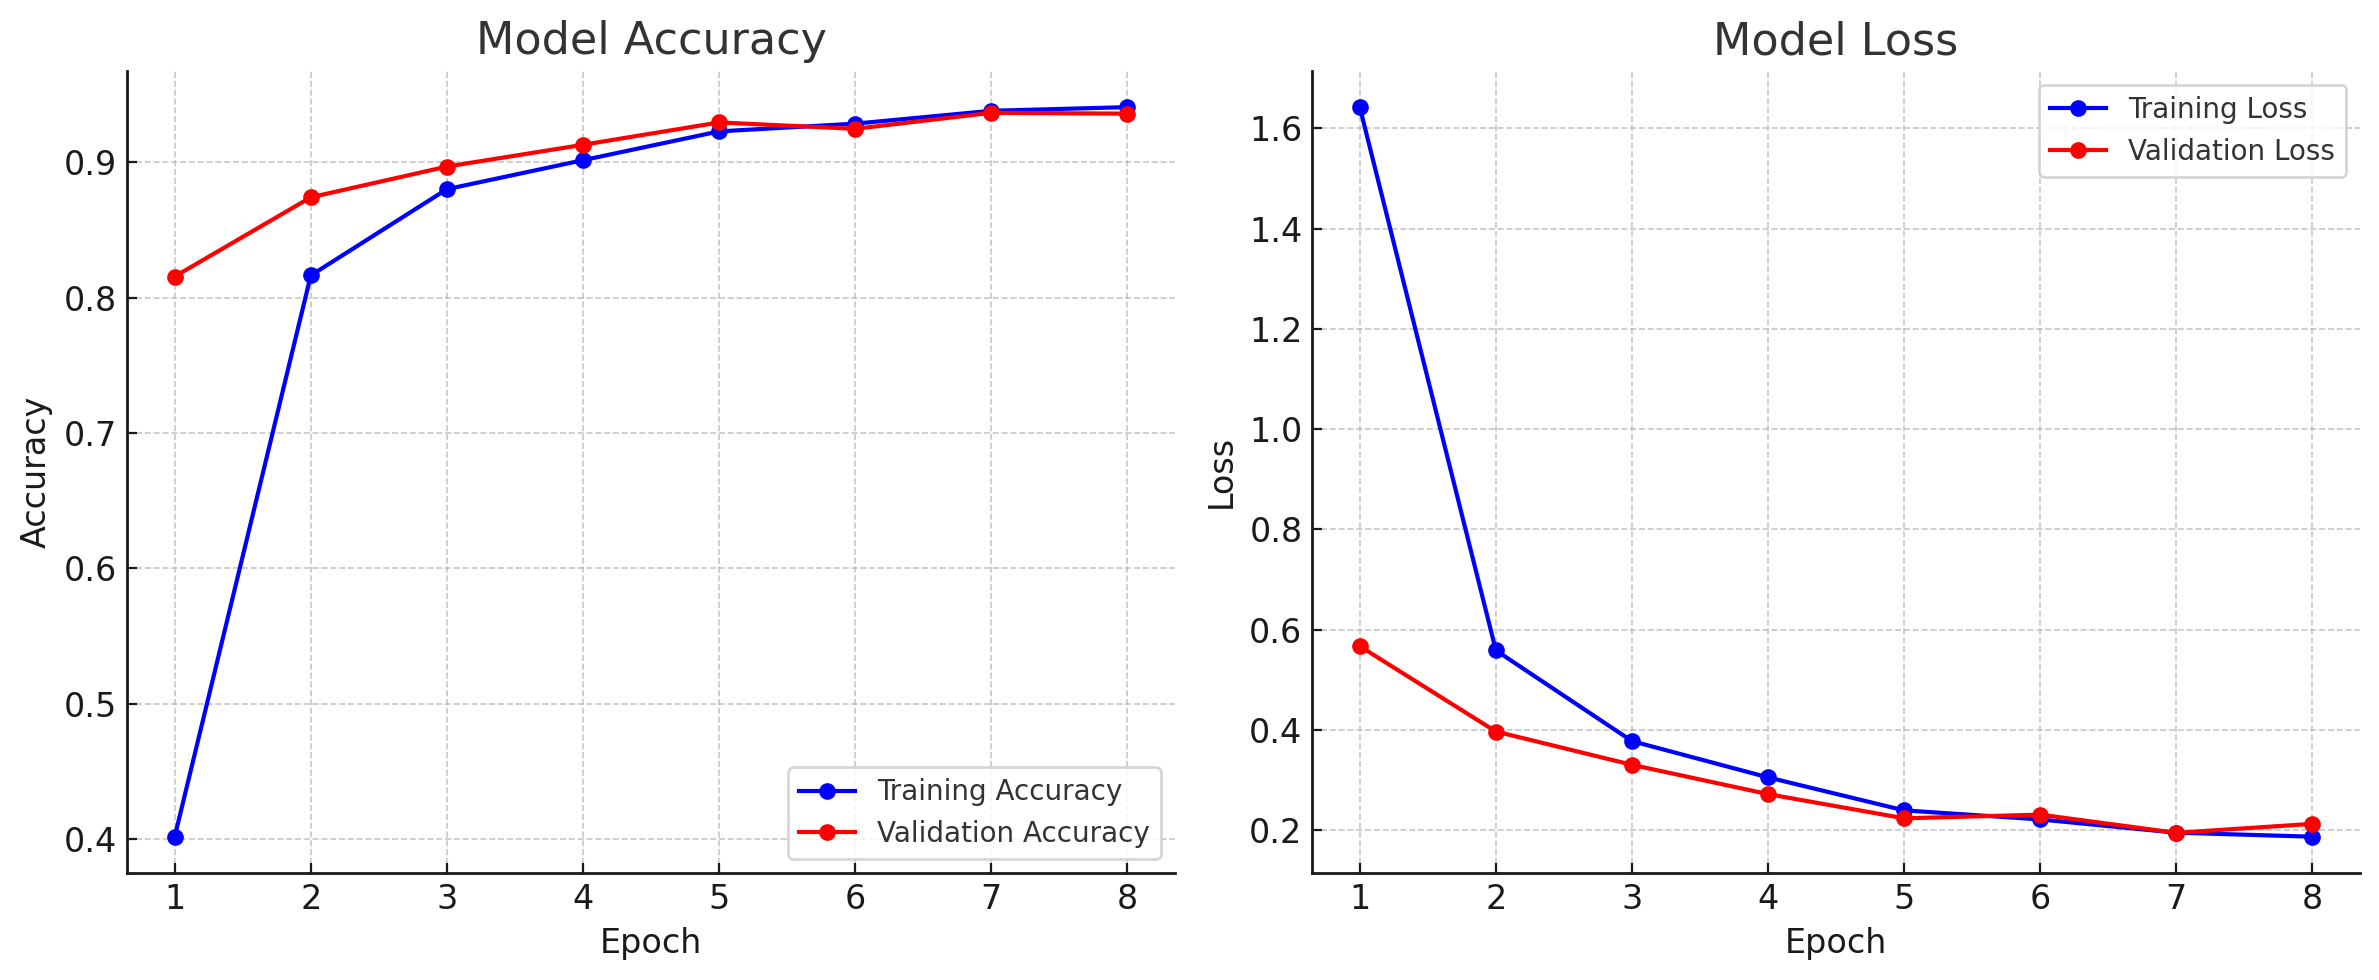